In [43]:
import pandas as pd
import seaborn as sns

# Darker Image

Going through the exercises in [Stochastic Modeling by Barry Nelson](https://store.doverpublications.com/0486477703.html).  one of the first case studies in the Darker image copier problem.

In [42]:
# read the data
df = pd.read_csv("../data/data-darker_image.csv", na_values=['na'])

# Get service time from customers
customer_selector = df['action'] != 'open'
df_customers = df[customer_selector].pivot_table(columns='action',
                                                 index='customer_id',
                                                 values='time',
                                                 aggfunc=min)
df_customers['service_time'] = df_customers.finish - df_customers.arrival

# get service type
service_selector = ~df['note'].isna() & customer_selector
target_cols = ['note', 'customer_id']
df_customers = df_customers.merge(df[service_selector][target_cols],
                                  how='left',
                                  right_on='customer_id',
                                  left_index=True)
df_customers['customer_id'] = df_customers['customer_id'].astype(int)
df_customers = df_customers.set_index('customer_id')
df_customers['self_service'] = False
df_customers.loc[df_customers['note'].isna(), 'self_service'] = True

df_customers

,arrival,finish,service_time,note,self_service
customer_id,,,,,
1,12,19,7,"collate, staple",False
2,14,21,7,NaN,True
3,17,22,5,NaN,True
4,38,41,3,NaN,True
5,39,57,18,special paper,False
6,43,60,17,NaN,True
7,45,61,16,NaN,True
8,52,68,16,NaN,True
9,58,71,13,"collate, covers",False


<Axes: xlabel='service_time', ylabel='Count'>

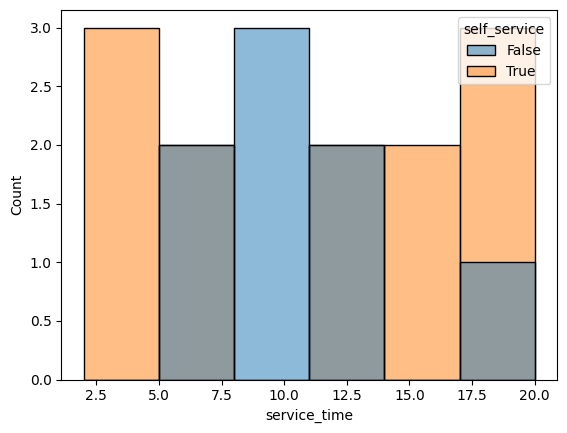

In [44]:
sns.histplot(df_customers,
             x='service_time',
             hue='self_service')